<a href="https://colab.research.google.com/github/bytewithpalak/Polymer-Classification-using-ML/blob/main/Polymer_Classification_prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")


In [ ]:
df= pd.read_csv('/content/polymers_dataset.csv')

In [ ]:
df.head()


,Unnamed: 0,smiles,label,0,1,2,3,4,5,6,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,C(Cl)CCC(c1ccccc1)CCC(Cl)C,plastic,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,OC(=O)[C@]([H])(CC1=CC=C(O)C=C1)NC(=O)[C@]([H]...,peptide,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,O[C@]([C@@]([H])(CO)O[C@@](O)([H])[C@]([H])1O)...,oligosaccharide,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,C(Cl)CCC(c1ccccc1)C(Cl)CCC,plastic,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,CCC(Cl)CC(Cl)CCCC(C)CCC(c1ccccc1),plastic,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20609 entries, 0 to 20608
Columns: 2051 entries, Unnamed: 0 to 2047
dtypes: int64(2049), object(2)
memory usage: 322.5+ MB


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
smiles,0
label,0
0,0
1,0
...,...
2043,0
2044,0
2045,0
2046,0


In [ ]:
print("Shape of Dataset:",df.shape)

Shape of Dataset: (20609, 2051)


In [ ]:
print("Columns of Dataset:",df.columns)

Columns of Dataset: Index(['Unnamed: 0', 'smiles', 'label', '0', '1', '2', '3', '4', '5', '6',
       ...
       '2038', '2039', '2040', '2041', '2042', '2043', '2044', '2045', '2046',
       '2047'],
      dtype='object', length=2051)


In [ ]:
 df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
print(df.shape)


(20609, 2050)


In [ ]:
X=df.drop(columns=['label','smiles'])
y=df['label']

In [ ]:
X.shape

(20609, 2048)

In [ ]:
y.shape

(20609,)

In [ ]:
y

,label
0,plastic
1,peptide
2,oligosaccharide
3,plastic
4,plastic
...,...
20604,plastic
20605,oligosaccharide
20606,oligosaccharide
20607,peptide


In [ ]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [ ]:
scaler = StandardScaler()


In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.4,random_state=42)

In [ ]:
print("Training data shape:", X_train.shape)

Training data shape: (12365, 2048)


In [ ]:
print("Testing data shape:", X_test.shape)

Testing data shape: (8244, 2048)


RANDOM FOREST CLASSIFIER


In [ ]:
model= RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred

array(['plastic', 'oligosaccharide', 'oligosaccharide', ..., 'peptide',
       'plastic', 'oligosaccharide'], dtype=object)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc,4))

Accuracy: 1.0


In [ ]:
print ("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
                  precision    recall  f1-score   support

oligosaccharide       1.00      1.00      1.00      2696
        peptide       1.00      1.00      1.00      2789
        plastic       1.00      1.00      1.00      2759

       accuracy                           1.00      8244
      macro avg       1.00      1.00      1.00      8244
   weighted avg       1.00      1.00      1.00      8244



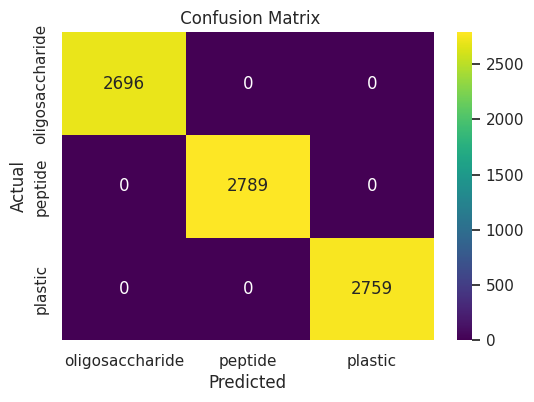

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(" Confusion Matrix")
plt.show()

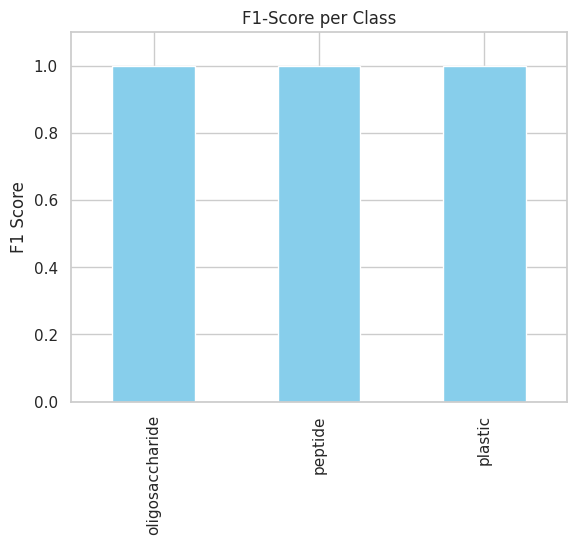

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)


report_df = pd.DataFrame(report).transpose()


report_df.iloc[:-3]["f1-score"].plot(kind='bar', color='skyblue')
plt.title("F1-Score per Class")
plt.ylabel("F1 Score")
plt.ylim(0, 1.1)
plt.grid(True)
plt.show()

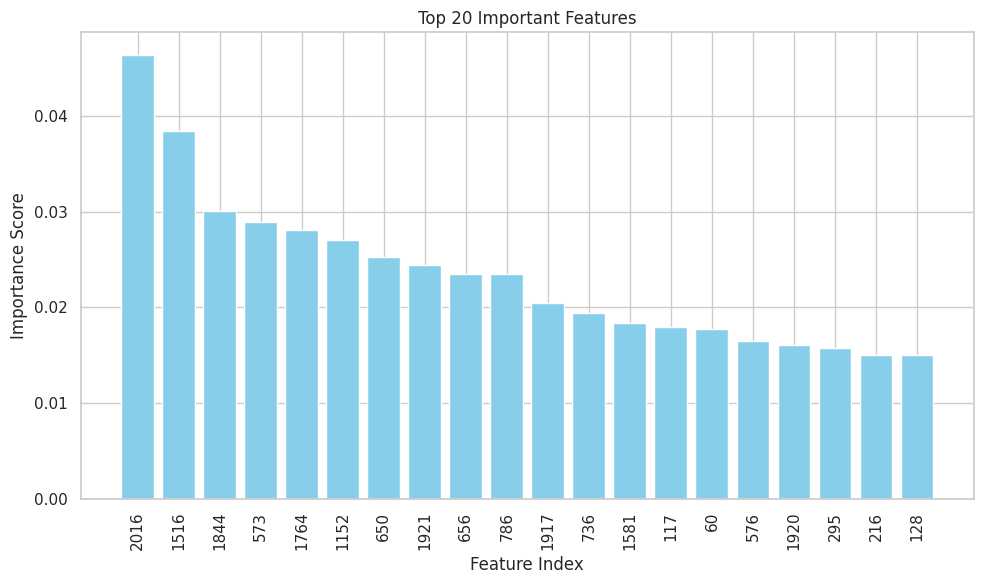

In [ ]:
importances = model.feature_importances_

indices = np.argsort(importances)[::-1][:20]


plt.figure(figsize=(10, 6))
plt.bar(range(len(indices)), importances[indices], color='skyblue')
plt.xticks(range(len(indices)), indices, rotation=90)
plt.title("Top 20 Important Features")
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

 KNN



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)



In [ ]:
y_pred

array(['plastic', 'oligosaccharide', 'oligosaccharide', ..., 'peptide',
       'plastic', 'oligosaccharide'], dtype=object)

In [ ]:
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9918728772440563

KNN Classification Report:
                  precision    recall  f1-score   support

oligosaccharide       1.00      1.00      1.00      2696
        peptide       1.00      0.98      0.99      2789
        plastic       0.98      1.00      0.99      2759

       accuracy                           0.99      8244
      macro avg       0.99      0.99      0.99      8244
   weighted avg       0.99      0.99      0.99      8244



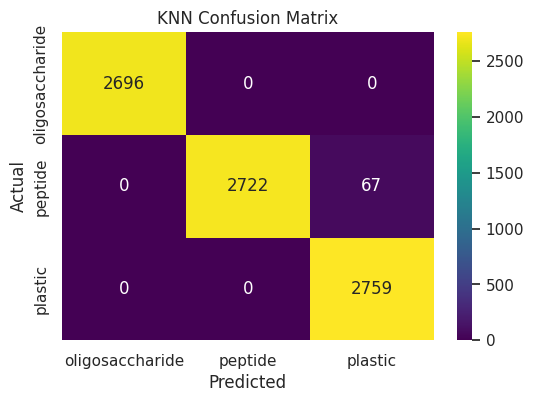

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()

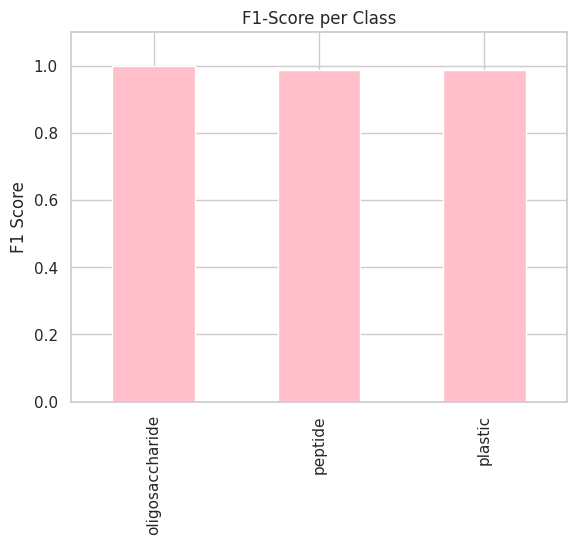

In [ ]:
report = classification_report(y_test, y_pred_knn, output_dict=True)


report_df = pd.DataFrame(report).transpose()


report_df.iloc[:-3]["f1-score"].plot(kind='bar', color='pink')
plt.title("F1-Score per Class")
plt.ylabel("F1 Score")
plt.ylim(0, 1.1)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.svm import SVC

svm= SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm=svm.predict(X_test)

In [ ]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 1.0

SVM Classification Report:
                  precision    recall  f1-score   support

oligosaccharide       1.00      1.00      1.00      2696
        peptide       1.00      1.00      1.00      2789
        plastic       1.00      1.00      1.00      2759

       accuracy                           1.00      8244
      macro avg       1.00      1.00      1.00      8244
   weighted avg       1.00      1.00      1.00      8244



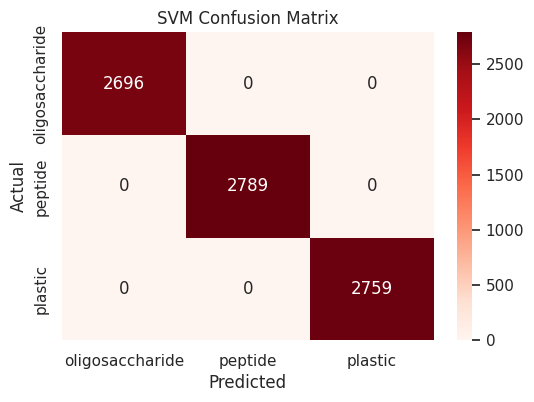

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Reds',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
!pip install xgboost

In [ ]:
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42)
import xgboost as xgb
xgb_model= xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train_encoded)
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("XGBoost Accuracy:", accuracy_score(y_test_encoded, y_pred_xgb))
print("\nXGBoost Classification Report:\n", classification_report(y_test_encoded, y_pred_xgb))


XGBoost Accuracy: 1.0

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1365
           1       1.00      1.00      1.00      1356
           2       1.00      1.00      1.00      1401

    accuracy                           1.00      4122
   macro avg       1.00      1.00      1.00      4122
weighted avg       1.00      1.00      1.00      4122



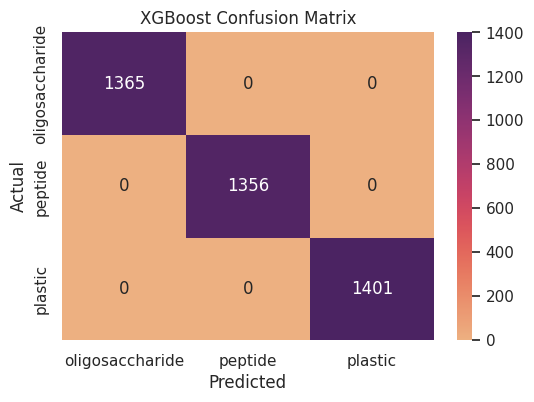

In [ ]:
cm_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)

plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='flare',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

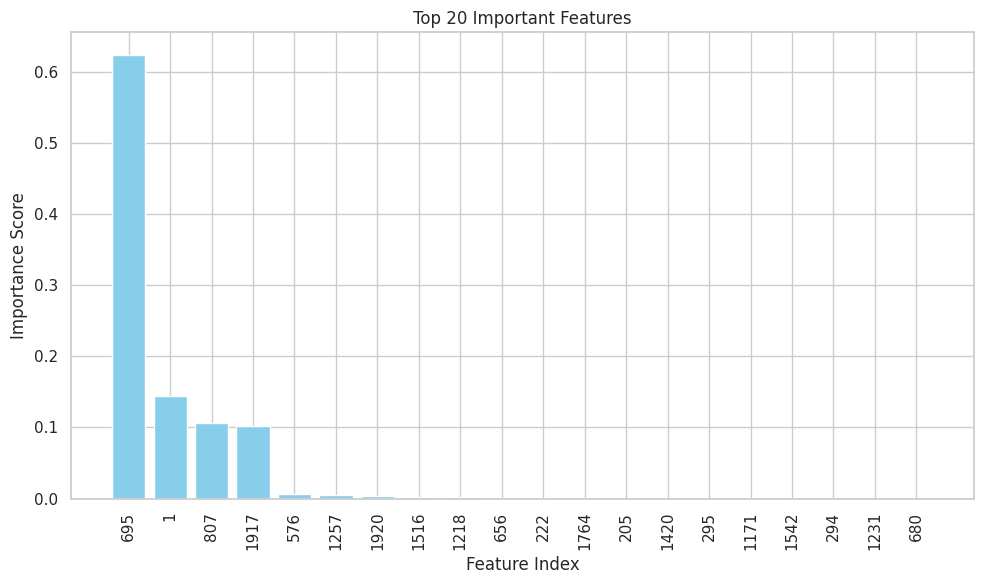

In [ ]:
importances = xgb_model.feature_importances_

indices = np.argsort(importances)[::-1][:20]


plt.figure(figsize=(10, 6))
plt.bar(range(len(indices)), importances[indices], color='skyblue')
plt.xticks(range(len(indices)), indices, rotation=90)
plt.title("Top 20 Important Features")
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

In [ ]:


results = {
    "Model": ["Random Forest", "KNN", "SVM", "XGBoost"],
    "Accuracy": [1.00, 0.975, 1.00, 1.00],
    "Notes": [
        "Perfect accuracy, interpretable",
        "Slightly lower, distance-based",
        "Perfect accuracy, clean margin",
        "Perfect accuracy, fast + scalable"
    ]
}

df_results = pd.DataFrame(results)
df_results


,Model,Accuracy,Notes
0,Random Forest,1.000,"Perfect accuracy, interpretable"
1,KNN,0.975,"Slightly lower, distance-based"
2,SVM,1.000,"Perfect accuracy, clean margin"
3,XGBoost,1.000,"Perfect accuracy, fast + scalable"


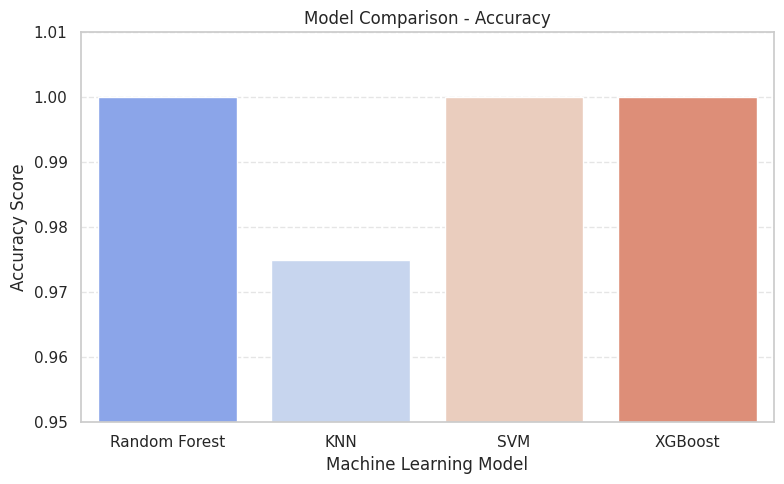

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=df_results, palette='coolwarm')
plt.ylim(0.95, 1.01)
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy Score")
plt.xlabel("Machine Learning Model")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [1]:

!pip install streamlit joblib

code = """
import streamlit as st
import pandas as pd
import joblib

# Load saved model and tools
model = joblib.load("polymer_rf_model.pkl")
scaler = joblib.load("scaler.pkl")
le = joblib.load("label_encoder.pkl")

st.title("🔬 Polymer Type Classifier")

uploaded_file = st.file_uploader("Upload your polymer CSV file", type=["csv"])

if uploaded_file:
    df = pd.read_csv(uploaded_file)
    st.subheader("📄 Input Data")
    st.write(df.head())

    # Preprocess uploaded data
    X_new = df.drop(columns=["smiles"], errors="ignore")
    X_scaled = scaler.transform(X_new)

    # Make predictions
    y_pred = model.predict(X_scaled)
    y_label = le.inverse_transform(y_pred)

    st.subheader("🧪 Predicted Polymer Types")
    st.write(pd.DataFrame(y_label, columns=["Predicted Type"]))
"""

with open("app.py", "w") as f:
    f.write(code)

print("✅ app.py file created!")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00
✅ app.py file created!
